# Abalone Age Prediction

In [1]:
import pandas as pd
from sklearn import metrics

## Dataset

In [2]:
file_path = './data/abalone.csv'
df = pd.read_csv(file_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Age'] = df['Rings'] + 1.5

df = df.drop(['Rings'], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Data Analysis

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
# Get the shape of the data
df.shape

(4177, 9)

In [7]:
# Get the column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [8]:
# Count missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [9]:
# Select duplicated rows
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


Seems like there is no duplicated data

In [10]:
# Select categorical data, numerical data
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['float64', 'int64'])

categorical_data.head(), numerical_data.head()

(  Sex
 0   M
 1   M
 2   F
 3   M
 4   I,
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight   Age  
 0         0.150  16.5  
 1         0.070   8.5  
 2         0.210  10.5  
 3         0.155  11.5  
 4         0.055   8.5  )

In [11]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Data visualization

(1.0999999999999999, 31.9, 0.0, 1730.4)

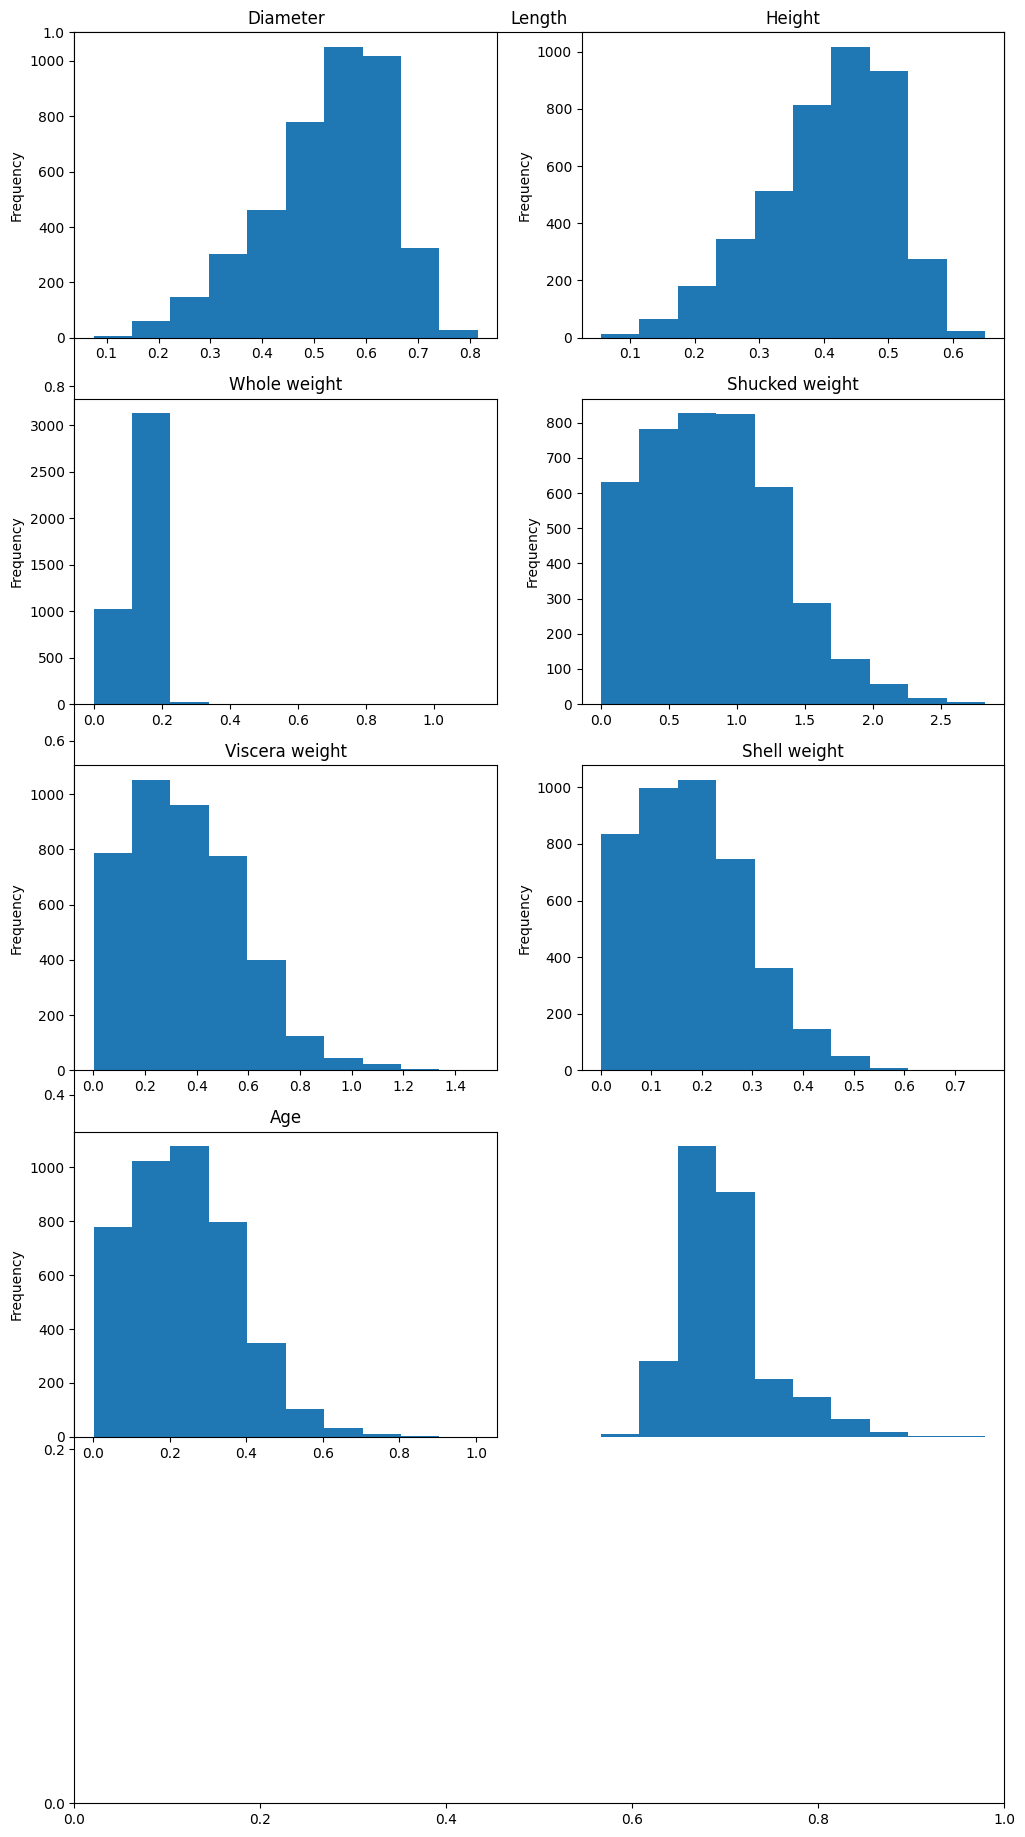

In [12]:
import matplotlib.pyplot as plt
# Plot age
plt.figure(figsize=(12, 23))
for i, col in enumerate(numerical_data):
  plt.title(col, fontsize=12)
  ax = plt.subplot(5, 2, i+1)
  if col == 'Sex':
    df[col].value_counts().plot.bar()
  else:
    df[col].plot.hist()
plt.axis(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c17dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x3360ccf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1774ddd30>],
 'medians': [<matplotlib.lines.Line2D at 0x3360cd4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3360cd700>],
 'means': []}

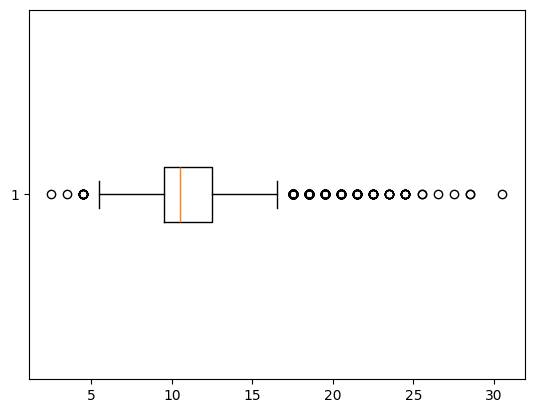

In [13]:
plt.boxplot(df['Age'], vert=False)

## Feature Correlation

In [14]:
pearson_corr = df.corr('pearson', numeric_only=True)
pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

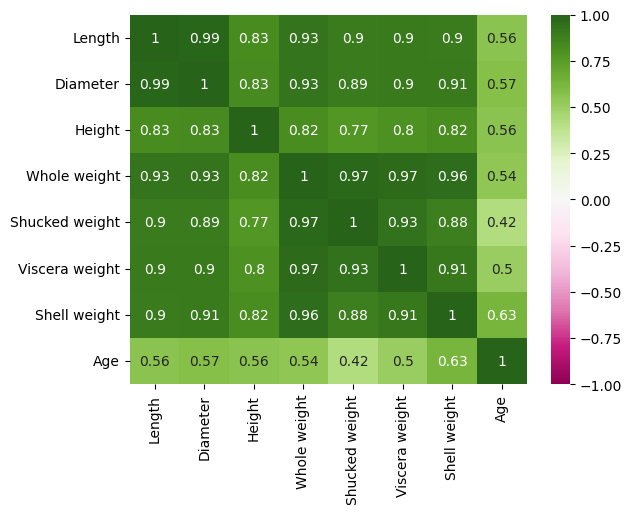

In [15]:
import seaborn as sns

sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmax=1, vmin=-1)

## Cleaning Data

In [16]:
import numpy as np
def remove_outliers(df: pd.DataFrame):
  numerical_df = df.select_dtypes(include=np.number)
  Q1 = numerical_df.quantile(0.25)
  Q3 = numerical_df.quantile(0.75)
  IQR = Q3 - Q1
  
  outlier = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
  return df[~outlier]

df = remove_outliers(df)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


{'whiskers': [<matplotlib.lines.Line2D at 0x174909250>,
 'caps': [<matplotlib.lines.Line2D at 0x174f32780>,
 'boxes': [<matplotlib.lines.Line2D at 0x174f31f10>],
 'medians': [<matplotlib.lines.Line2D at 0x174f32d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x174f32f60>],
 'means': []}

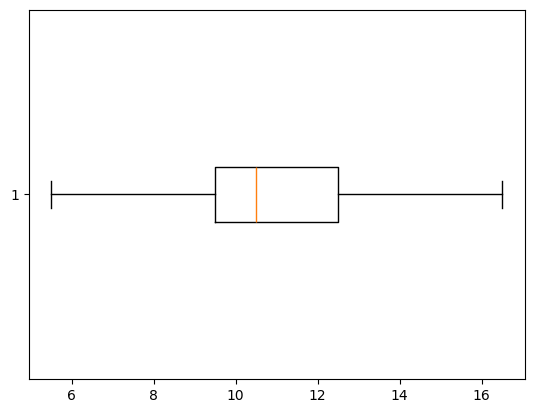

In [17]:
plt.boxplot(df['Age'], vert=False)

## Data Encoding

In [18]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [19]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

df.head()

/var/folders/6p/rzcxcc9s58v5jv0m1clm5r180000gn/T/ipykernel_71908/1718764929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [20]:
df.shape

(3781, 9)

In [21]:
numerical_data.shape

(4177, 8)

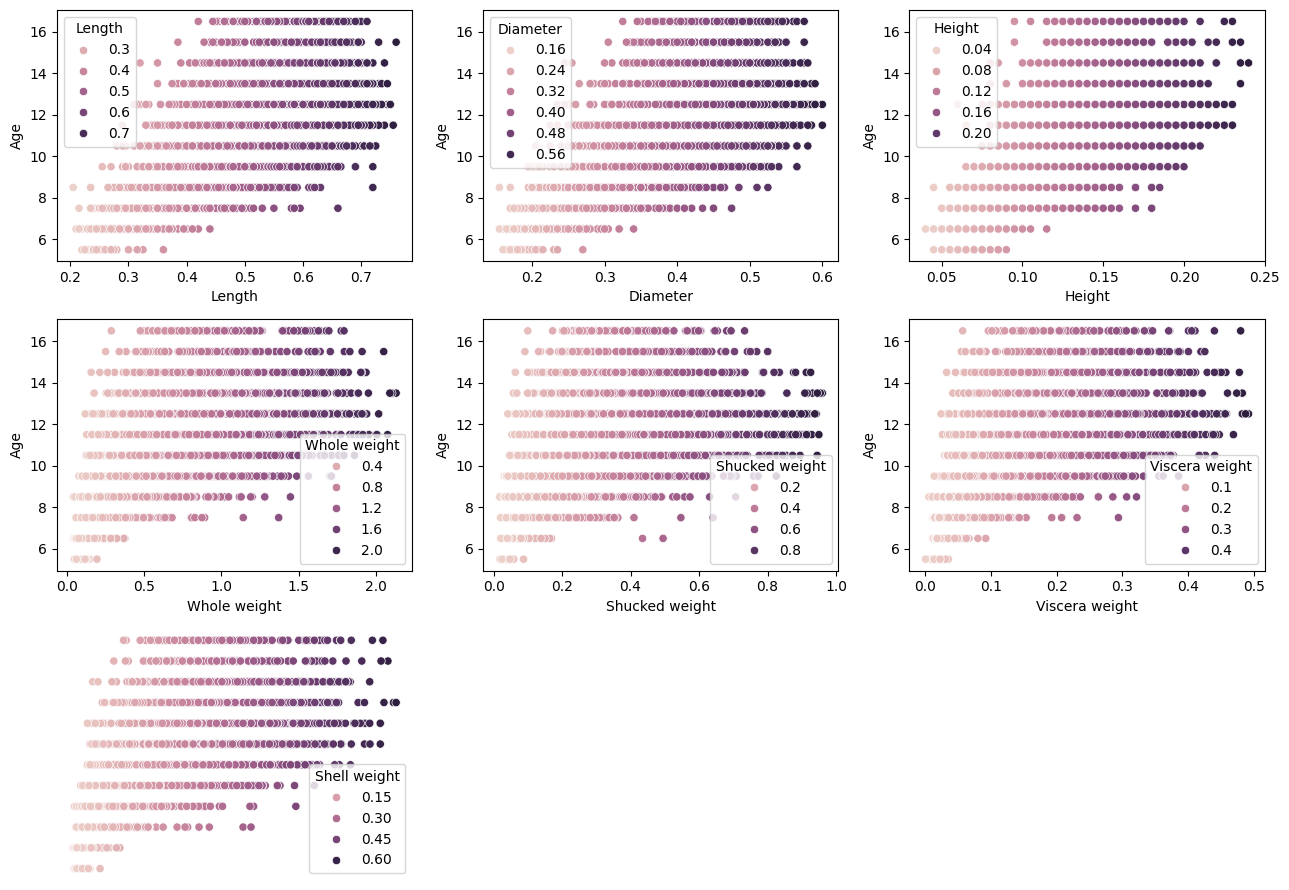

In [22]:
plt.figure(figsize=(13, 9))

target='Age'

for i, col in enumerate(numerical_data):
  if(col != target):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(df, x=col, y=target, hue=col)
    

plt.axis("off")
plt.tight_layout()

## Building Model

### Splitting data

In [23]:
from sklearn.model_selection import train_test_split
# Splitting data
train_data, test_data = train_test_split(df, random_state=42, test_size=0.25)

# Change datatype to float32
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
len(train_data), len(test_data)

(2835, 946)

#### Preparing data for model

In [24]:
input_features = df.drop(columns=['Age'])
target_feature = df['Age']

input_features, target_feature

(      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 0       0   0.455     0.365   0.095        0.5140          0.2245   
 1       0   0.350     0.265   0.090        0.2255          0.0995   
 2       1   0.530     0.420   0.135        0.6770          0.2565   
 3       0   0.440     0.365   0.125        0.5160          0.2155   
 4       2   0.330     0.255   0.080        0.2050          0.0895   
 ...   ...     ...       ...     ...           ...             ...   
 4172    1   0.565     0.450   0.165        0.8870          0.3700   
 4173    0   0.590     0.440   0.135        0.9660          0.4390   
 4174    0   0.600     0.475   0.205        1.1760          0.5255   
 4175    1   0.625     0.485   0.150        1.0945          0.5310   
 4176    0   0.710     0.555   0.195        1.9485          0.9455   
 
       Viscera weight  Shell weight  
 0             0.1010        0.1500  
 1             0.0485        0.0700  
 2             0.1415        0.2100  
 3    

In [25]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target_feature, test_size=0.25)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Linear Regression

#### Define the model

In [26]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linear_reg.predict(X_train)

In [28]:
r2_score = metrics.r2_score(y_train, y_pred)
mse_score = metrics.mean_squared_error(y_train, y_pred)

print("R Squarred Error Score: ", r2_score)
print("MSE Score: ", mse_score)

R Squarred Error Score:  0.5085147023200989
MSE Score:  2.6544225


In [29]:
y_pred_test = linear_reg.predict(X_test)
y_pred_test[:5], y_test[:5]

(array([10.4382105, 11.13546  , 13.038602 , 10.5155325, 11.324047 ],
       dtype=float32),
 2770    11.5
 225     10.5
 1367    11.5
 3268    12.5
 3047    10.5
 Name: Age, dtype: float32)

In [30]:
r2_score = metrics.r2_score(y_test, y_pred_test)
mse_score = metrics.mean_squared_error(y_test, y_pred_test)

print("R Squarred Error Score: ", r2_score)
print("MSE Score: ", mse_score)

R Squarred Error Score:  0.4914363622665405
MSE Score:  2.803137


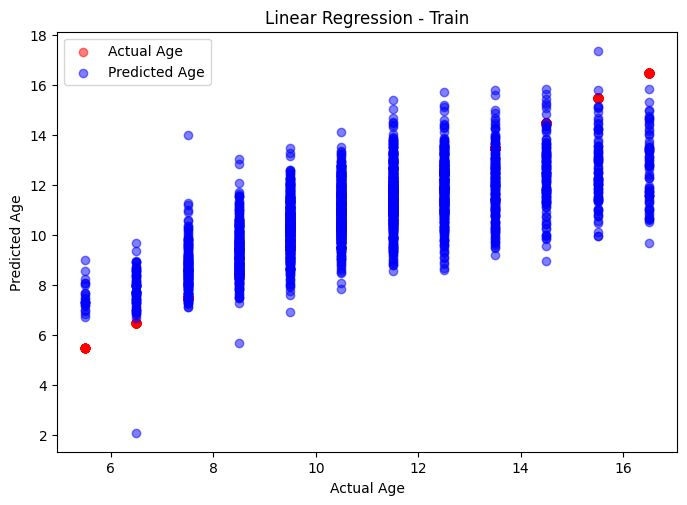

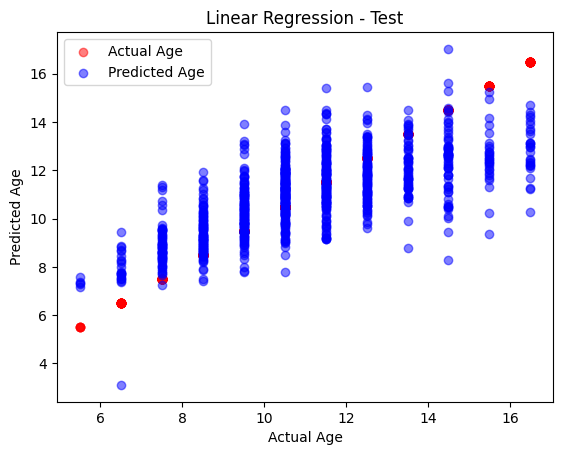

In [31]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)

plt.scatter(y_train, y_train, color='red', label='Actual Age', alpha=0.5)
plt.scatter(y_train, y_pred, color='blue', label='Predicted Age', alpha=0.5)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title("Linear Regression - Train")
plt.legend()
plt.show()

plt.scatter(y_test, y_test, color='red', label='Actual Age', alpha=0.5)
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted Age', alpha=0.5)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title("Linear Regression - Test")
plt.legend()
plt.show()

### Support Vector Regressor

#### Define the model

In [32]:
from sklearn.svm import SVR
linear_svr = SVR(C=1.0, epsilon=0.2)
linear_svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [33]:
y_pred = linear_svr.predict(X_train)

In [34]:
r2_score = metrics.r2_score(y_train, y_pred)
mse_score = metrics.mean_squared_error(y_train, y_pred)

print("R Squarred Error Score: ", r2_score)
print("MSE Score: ", mse_score)

R Squarred Error Score:  0.5111152002489279
MSE Score:  2.6403774949087326


In [35]:
y_pred_test = linear_svr.predict(X_test)

y_pred_test[:5], y_test[:5]

(array([10.60484403, 11.41557709, 12.34621021, 10.21357649, 10.99806841]),
 2770    11.5
 225     10.5
 1367    11.5
 3268    12.5
 3047    10.5
 Name: Age, dtype: float32)

In [36]:
r2_score = metrics.r2_score(y_test, y_pred_test)
mse_score = metrics.mean_squared_error(y_test, y_pred_test)

print("R Squarred Error Score: ", r2_score)
print("MSE Score: ", mse_score)

R Squarred Error Score:  0.48902171401829964
MSE Score:  2.816446083329363


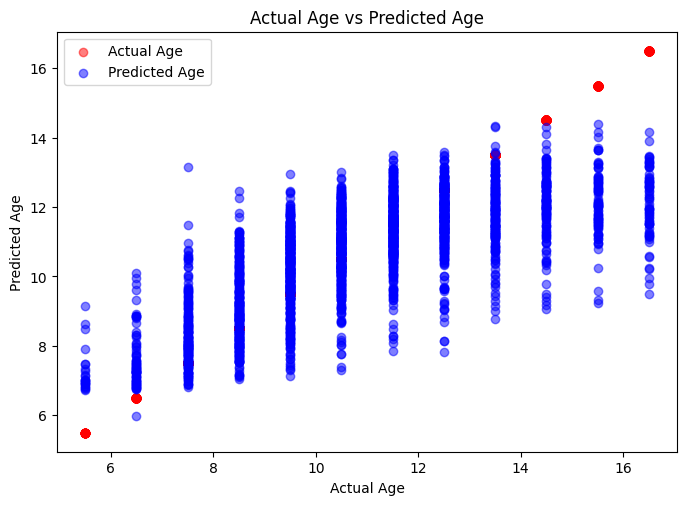

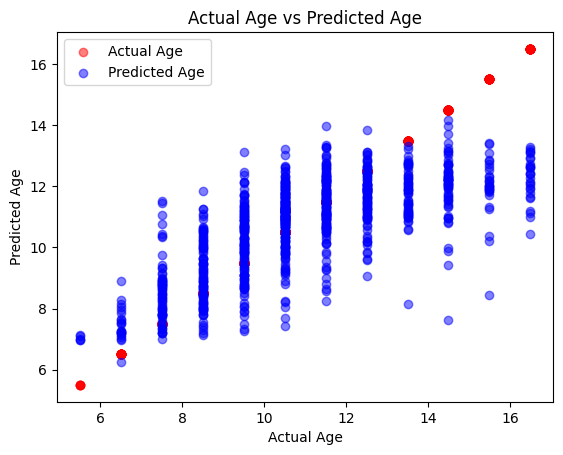

In [37]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)

plt.scatter(y_train, y_train, color='red', label='Actual Age', alpha=0.5)
plt.scatter(y_train, y_pred, color='blue', label='Predicted Age', alpha=0.5)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title("Actual Age vs Predicted Age")
plt.legend()
plt.show()

plt.scatter(y_test, y_test, color='red', label='Actual Age', alpha=0.5)
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted Age', alpha=0.5)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title("Actual Age vs Predicted Age")
plt.legend()
plt.show()

### Neural Network Model

#### Turn data into tensors

In [38]:
from nn_model import convert_numpy_to_tensor
tensor_train, tensor_test = convert_numpy_to_tensor(train_data=train_data, test_data=test_data)

tensor_train.dtype, tensor_test.dtype

(torch.float32, torch.float32)

#### Separate input data and target

In [39]:
from nn_model import separate_input_and_target

X_train, y_train = separate_input_and_target(data=tensor_train)
X_test, y_test  = separate_input_and_target(data=tensor_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([2835, 8]),
 torch.Size([2835, 1]),
 torch.Size([946, 8]),
 torch.Size([946, 1]))

In [40]:
X_train[:5], y_train[:5]

(tensor([[2.0000, 0.3850, 0.2900, 0.0800, 0.2485, 0.1220, 0.0495, 0.0650],
         [2.0000, 0.2150, 0.1550, 0.0600, 0.0525, 0.0210, 0.0165, 0.0150],
         [0.0000, 0.5350, 0.4200, 0.1250, 0.7380, 0.3550, 0.1895, 0.1795],
         [2.0000, 0.2500, 0.1800, 0.0650, 0.0805, 0.0345, 0.0185, 0.0215],
         [1.0000, 0.5100, 0.3800, 0.1300, 0.5840, 0.2240, 0.1355, 0.1850]]),
 tensor([[ 8.5000],
         [ 6.5000],
         [ 9.5000],
         [ 5.5000],
         [14.5000]]))

#### Initialize Model

In [41]:
from nn_model import NeuralNetworkModel

model_0 = NeuralNetworkModel(input_features=8, output_features=1)
model_0

NeuralNetworkModel(
  (layer_1): Sequential(
    (0): Linear(in_features=8, out_features=1, bias=True)
  )
)

#### Before Train predictions

In [42]:
y_pred = model_0(X_train)

y_pred[:5], y_train[:5]

(tensor([[-0.3995],
         [-0.4107],
         [-0.2107],
         [-0.4083],
         [-0.3189]], grad_fn=<SliceBackward0>),
 tensor([[ 8.5000],
         [ 6.5000],
         [ 9.5000],
         [ 5.5000],
         [14.5000]]))

#### Plot predictions

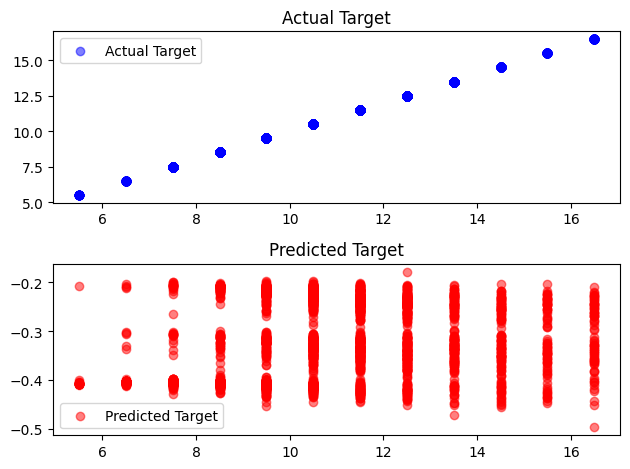

In [43]:
from nn_model import plot_pred
plot_pred(actual_value=y_train, pred=y_pred)

#### Setup loss function and Optimizer (Gradient Descent)

In [44]:
import torch
from torch import nn
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(lr=0.01, params=model_0.parameters())

In [45]:
from nn_model import train_fn
epochs = 10000

train_loss, test_loss = train_fn(model=model_0, 
      loss_fn=loss_fn,
      num_epochs=epochs,
      optimizer=optimizer,
      test_data=X_test,
      test_label=y_test,
      train_data=X_train,
      train_label=y_train)

print(f"-----\n")
print(f"Final Train loss: {train_loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 11.275858879089355 | Test loss: 11.15229320526123
Epoch: 1000 | Train loss: 1.5959787368774414 | Test loss: 1.652295708656311
Epoch: 2000 | Train loss: 1.3409976959228516 | Test loss: 1.3731756210327148
Epoch: 3000 | Train loss: 1.3001973628997803 | Test loss: 1.3185020685195923
Epoch: 4000 | Train loss: 1.2755972146987915 | Test loss: 1.2862701416015625
Epoch: 5000 | Train loss: 1.2623882293701172 | Test loss: 1.264674186706543
Epoch: 6000 | Train loss: 1.2570699453353882 | Test loss: 1.2537015676498413
Epoch: 7000 | Train loss: 1.254472255706787 | Test loss: 1.24946928024292
Epoch: 8000 | Train loss: 1.2521206140518188 | Test loss: 1.2477704286575317
Epoch: 9000 | Train loss: 1.25043785572052 | Test loss: 1.2467066049575806
-----

Final Train loss: 1.2496676445007324 | Test loss: 1.2470729351043701


In [46]:
model_0.eval()
with torch.inference_mode():
  y_pred_new = model_0(X_test)

y_pred_new[:5], y_test[:5]

(tensor([[9.9939],
         [9.4414],
         [9.9571],
         [8.3739],
         [9.3023]]),
 tensor([[8.5000],
         [8.5000],
         [9.5000],
         [8.5000],
         [9.5000]]))

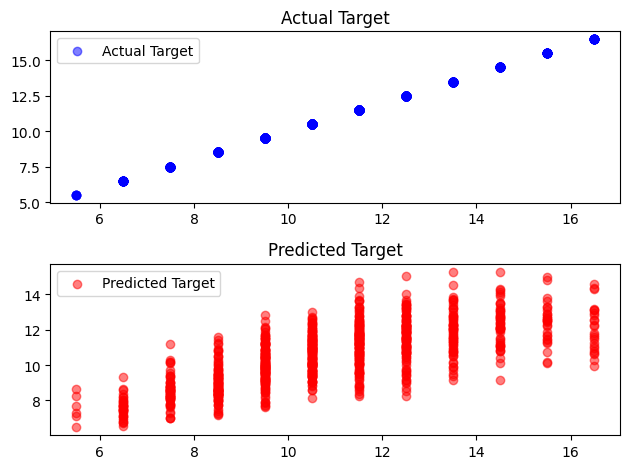

In [47]:
from nn_model import plot_pred
plot_pred(actual_value=y_test, pred=y_pred_new)